###################### DATALARI OKUDUK #######################



In [ ]:
import pandas as pd

In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 1000)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.float_format", lambda x:  "%.4f" % x)

In [ ]:
#dataları okuyoruz
df = pd.read_csv("/content/HRDataset_v14.csv")
df.head(8)

Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  Termd  PositionID                  Position State   Zip       DOB Sex MaritalDesc CitizenDesc HispanicLatino RaceDesc  DateofHire DateofTermination         TermReason        EmploymentStatus            Department      ManagerName  ManagerID  RecruitmentSource PerformanceScore  EngagementSurvey  EmpSatisfaction  SpecialProjectsCount LastPerformanceReview_Date  DaysLateLast30  Absences
0       Adinolfi, Wilson  K  10026          0                0         1            1       5            4                       0   62506      0          19   Production Technician I    MA  1960  07/10/83  M       Single  US Citizen             No    White    7/5/2011               NaN  N/A-StillEmployed                  Active     Production          Michael Albert    22.0000           LinkedIn          Exceeds            4.6000                5                     0                  1/17/2019               0         1
1  Ait Sidi, Karthikeyan     10084          1                1         1            5       3            3                       0  104437      1          27                   Sr. DBA    MA  2148  05/05/75  M      Married  US Citizen             No    White   3/30/2015         6/16/2016      career change  Voluntarily Terminated                 IT/IS       Simon Roup     4.0000             Indeed      Fully Meets            4.9600                3                     6                  2/24/2016               0        17
2         Akinkuolie, Sarah  10196          1                1         0            5       5            3                       0   64955      1          20  Production Technician II    MA  1810  09/19/88   F     Married  US Citizen             No    White    7/5/2011         9/24/2012              hours  Voluntarily Terminated     Production          Kissy Sullivan    20.0000           LinkedIn      Fully Meets            3.0200                3                     0                  5/15/2012               0         3
3              Alagbe,Trina  10088          1                1         0            1       5            3                       0   64991      0          19   Production Technician I    MA  1886  09/27/88   F     Married  US Citizen             No    White    1/7/2008               NaN  N/A-StillEmployed                  Active     Production            Elijiah Gray    16.0000             Indeed      Fully Meets            4.8400                5                     0                   1/3/2019               0        15
4          Anderson, Carol   10069          0                2         0            5       5            3                       0   50825      1          19   Production Technician I    MA  2169  09/08/89   F    Divorced  US Citizen             No    White   7/11/2011          9/6/2016   return to school  Voluntarily Terminated     Production          Webster Butler    39.0000      Google Search      Fully Meets            5.0000                4                     0                   2/1/2016               0         2
5         Anderson, Linda    10002          0                0         0            1       5            4                       0   57568      0          19   Production Technician I    MA  1844  05/22/77   F      Single  US Citizen             No    White    1/9/2012               NaN  N/A-StillEmployed                  Active     Production                Amy Dunn    11.0000           LinkedIn          Exceeds            5.0000                5                     0                   1/7/2019               0        15
6           Andreola, Colby  10194          0                0         0            1       4            3                       0   95660      0          24         Software Engineer    MA  2110  05/24/79   F      Single  US Citizen             No    White  11/10/2014               NaN  N/A-StillEmployed                  A

###################### df için tablo işlemleri #######################


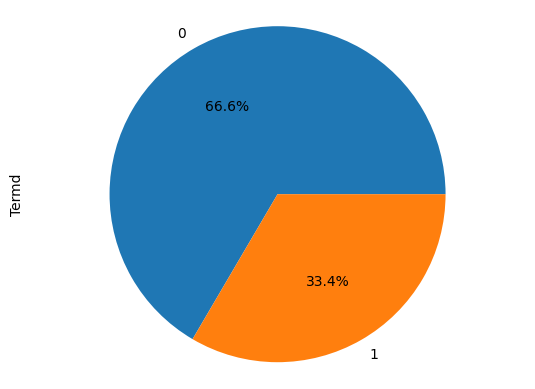

In [ ]:
import matplotlib.pyplot as plt
df["Termd"].value_counts().plot.pie(subplots=True, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

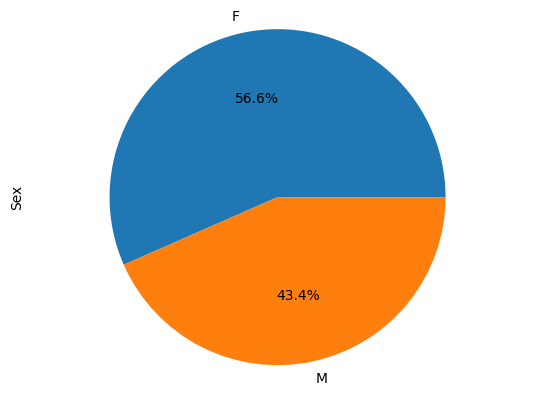

In [ ]:
df["Sex"].value_counts().plot.pie(subplots=True, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

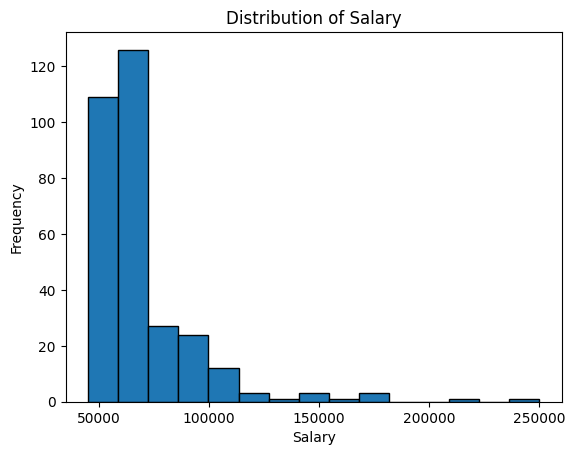

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df["Salary"], bins=15, edgecolor='black')
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Distribution of Salary")
plt.show()

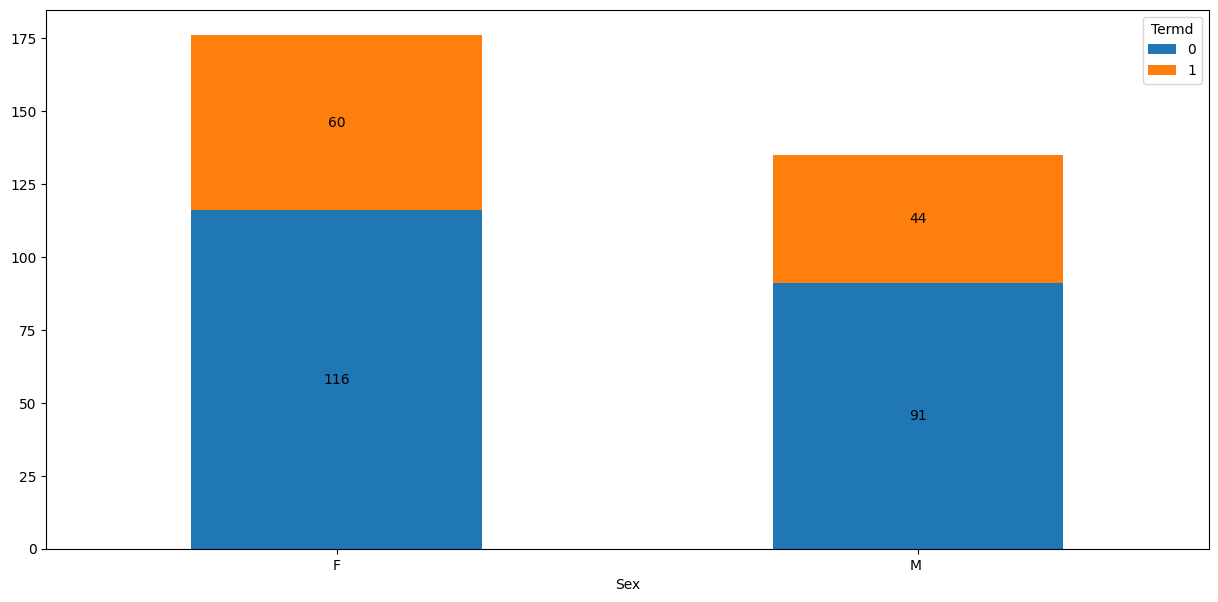

In [ ]:
TermdvsSex = pd.crosstab(df.Sex, df.Termd)
ax = TermdvsSex.plot(kind='bar',figsize=(15,7),stacked= True, rot =0, label = True)
for c in ax.containers:
    ax.bar_label(c, label_type='center')

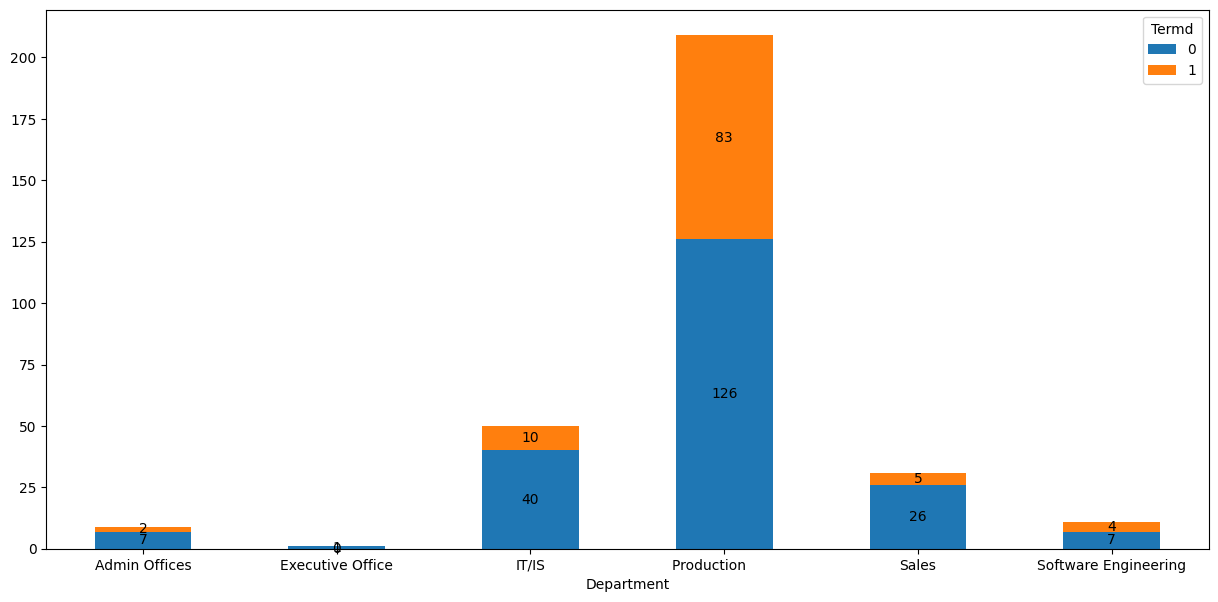

In [ ]:
TermdvsDepartment = pd.crosstab(df.Department, df.Termd)
ax = TermdvsDepartment.plot(kind='bar',figsize=(15,7),stacked= True, rot =0, label = True)
for c in ax.containers:
    ax.bar_label(c, label_type='center')


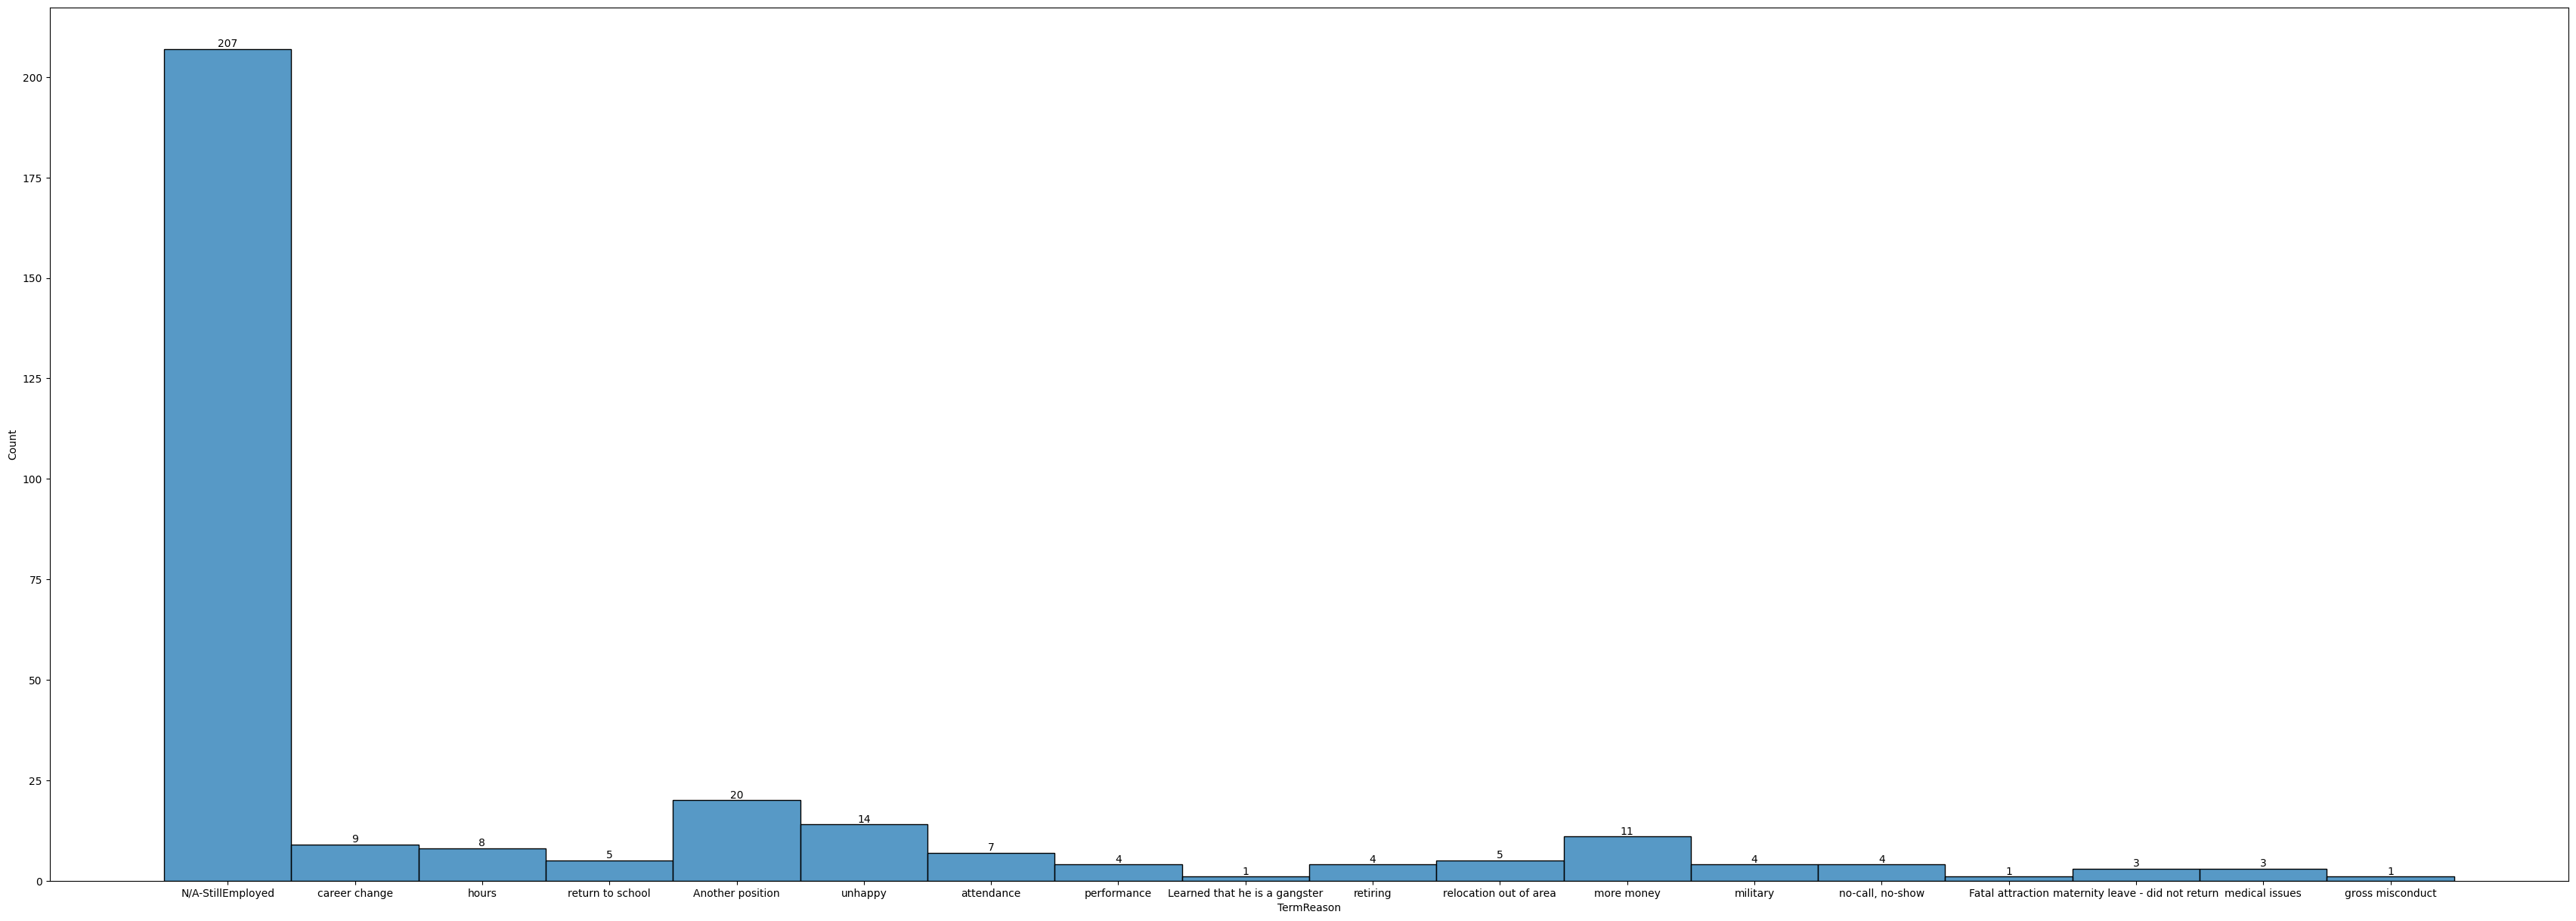

In [ ]:
import seaborn as sns
plt.figure(figsize = (43,15))
ax = sns.histplot(df.TermReason)
for c in ax.containers:
    ax.bar_label(c,label_type = 'edge')

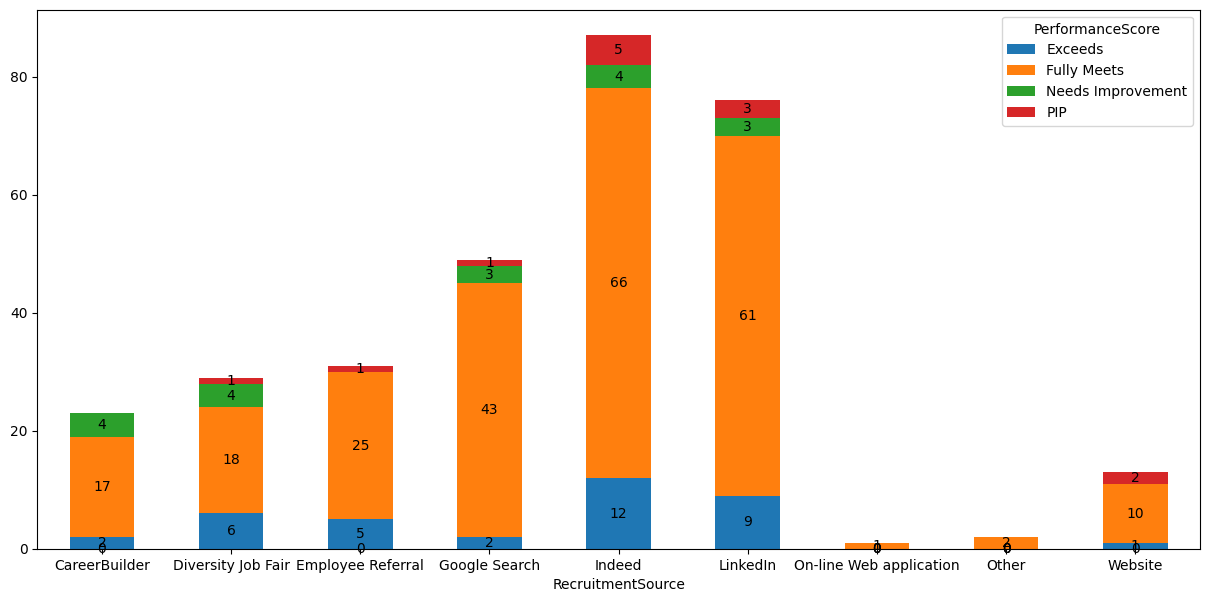

In [ ]:
JobSourceVPerfScore = pd.crosstab(df.RecruitmentSource, df.PerformanceScore)
ax = JobSourceVPerfScore.plot(kind='bar',figsize=(15,7),stacked= True, rot =0, label = True)
for c in ax.containers:
    ax.bar_label(c, label_type='center')

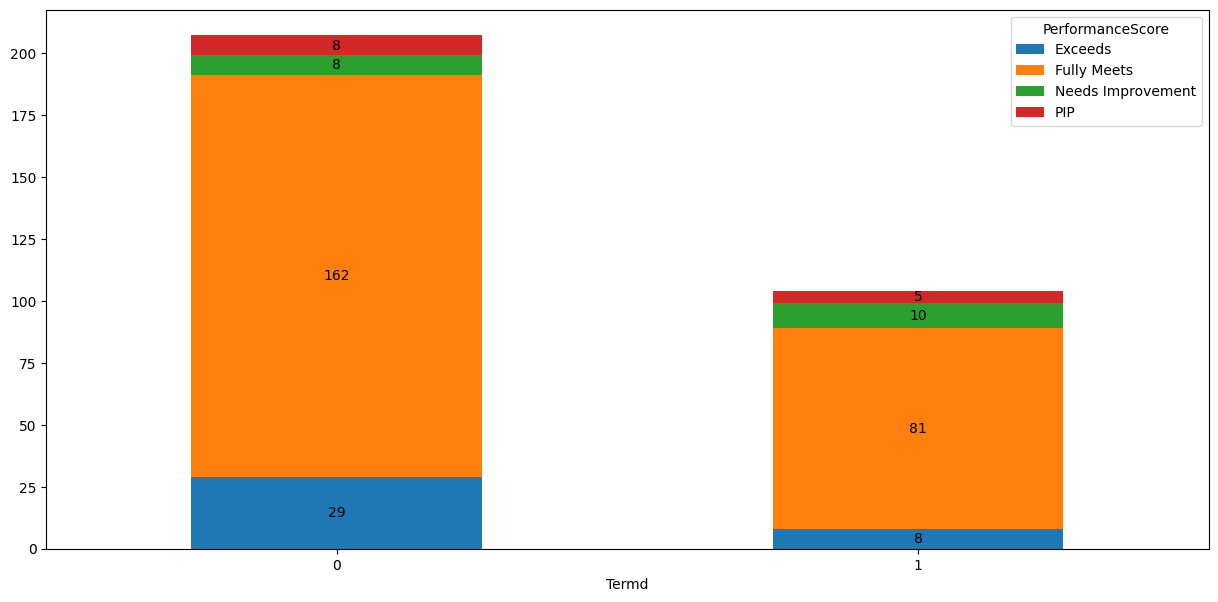

In [ ]:
TermdVPerfScore = pd.crosstab(df.Termd, df.PerformanceScore)
ax = TermdVPerfScore.plot(kind='bar',figsize=(15,7),stacked= True, rot =0, label = True)
for c in ax.containers:
    ax.bar_label(c, label_type='center')


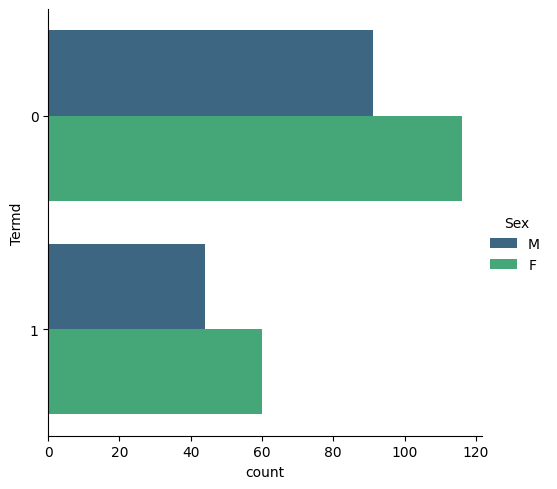

In [ ]:
import seaborn as sns
sns.catplot(y="Termd", hue="Sex", data=df, kind="count",palette='viridis')
plt.show()

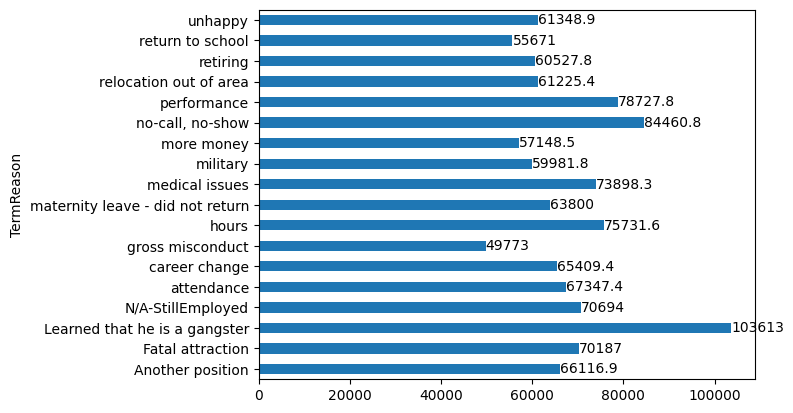

In [ ]:
MeanOfSalaries = df.groupby('TermReason')['Salary'].mean()

ax1 = MeanOfSalaries.plot(kind = "barh")
for c in ax1.containers:
    ax1.bar_label(c,label_type = 'edge')

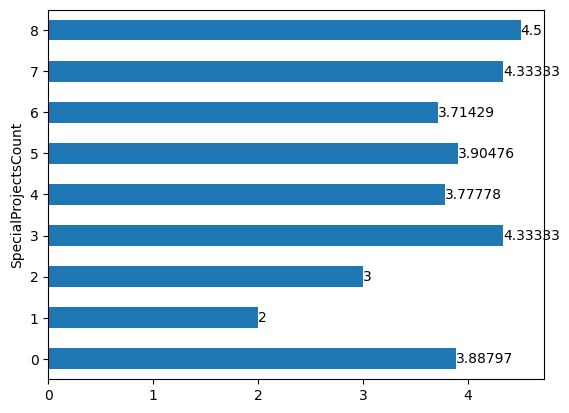

In [ ]:
EmpSatisfaction = df.groupby('SpecialProjectsCount')['EmpSatisfaction'].mean()

ax1 = EmpSatisfaction.plot(kind = "barh")
for c in ax1.containers:
    ax1.bar_label(c,label_type = 'edge')

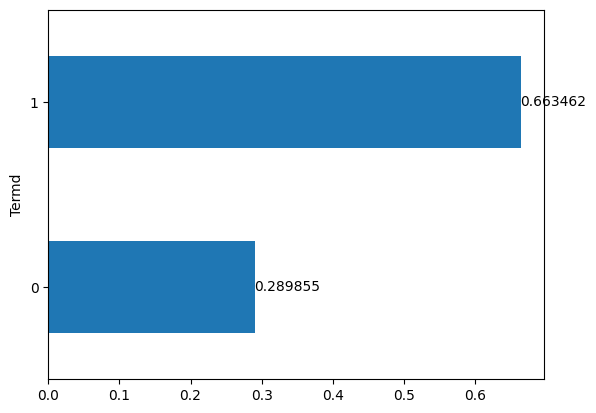

In [ ]:
DaysLateLast30 = df.groupby('Termd')['DaysLateLast30'].mean()

ax1 = DaysLateLast30.plot(kind = "barh")
for c in ax1.containers:
    ax1.bar_label(c,label_type = 'edge')

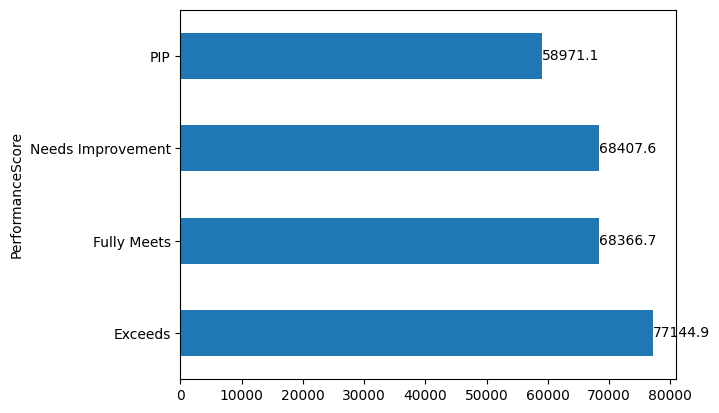

In [ ]:
MeanOfSalaries = df.groupby('PerformanceScore')['Salary'].mean()

ax1 = MeanOfSalaries.plot(kind = "barh")
for c in ax1.containers:
    ax1.bar_label(c,label_type = 'edge')

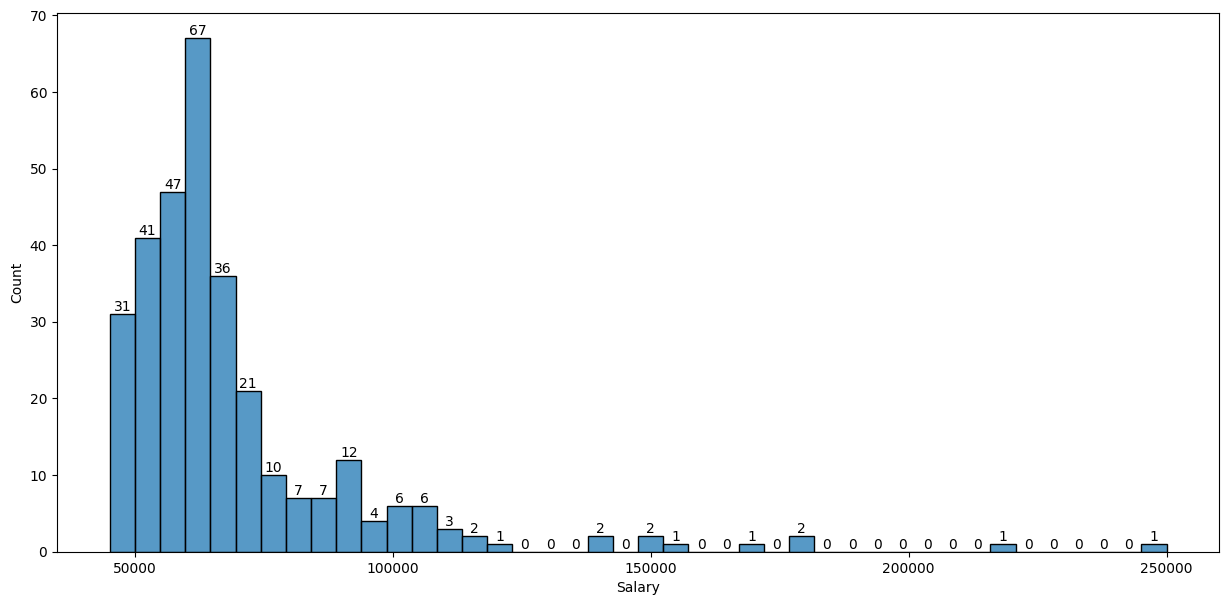

In [ ]:
import seaborn as sns
plt.figure(figsize = (15,7))
ax = sns.histplot(df.Salary)
for c in ax.containers:
    ax.bar_label(c,label_type = 'edge')

Sex
F    67786.7273
M    70629.4000
Name: Salary, dtype: float64


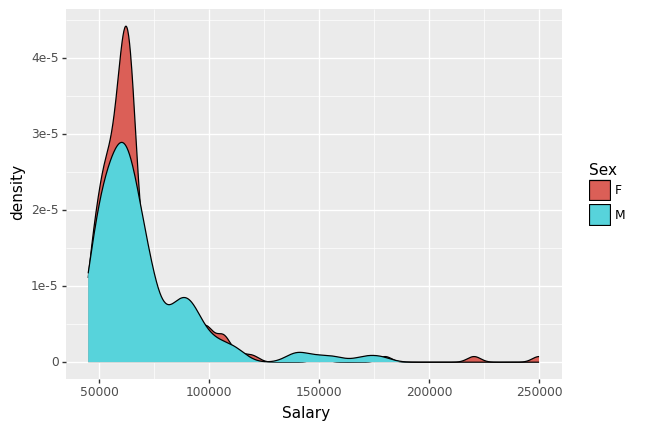

<ggplot: (8756122286372)>

In [ ]:
from plotnine import ggplot, aes, geom_density
print(df.groupby("Sex")["Salary"].mean())
Male = df[df['Sex'] == "M"]
Female = df[df['Sex'] == "F"]

ggplot(data = df, mapping = aes(x = 'Salary', fill = 'Sex')) +  geom_density()



In [ ]:
df.sort_values(by="Salary", ascending=False)

Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  Termd  PositionID                      Position State    Zip       DOB Sex MaritalDesc          CitizenDesc HispanicLatino                          RaceDesc  DateofHire DateofTermination                        TermReason        EmploymentStatus            Department         ManagerName  ManagerID        RecruitmentSource   PerformanceScore  EngagementSurvey  EmpSatisfaction  SpecialProjectsCount LastPerformanceReview_Date  DaysLateLast30  Absences
150                King, Janet  10089          1                1         0            1       2            3                       0  250000      0          16               President & CEO    MA   1902  09/21/54   F     Married           US Citizen            Yes                             White    7/2/2012               NaN                 N/A-StillEmployed                  Active      Executive Office  Board of Directors     9.0000                   Indeed        Fully Meets            4.8300                3                     0                  1/17/2019               0        10
308           Zamora, Jennifer  10010          0                0         0            1       3            4                       0  220450      0           6                           CIO    MA   2067  08/30/79   F      Single           US Citizen             No                             White   4/10/2010               NaN                 N/A-StillEmployed                  Active                 IT/IS          Janet King     2.0000        Employee Referral            Exceeds            4.6000                5                     6                  2/21/2019               0        16
131            Houlihan, Debra  10272          1                1         0            1       6            3                       0  180000      0          11             Director of Sales    RI   2908  03/17/66   F     Married           US Citizen             No                             White    5/5/2014               NaN                 N/A-StillEmployed                  Active                 Sales          Janet King     2.0000                 LinkedIn        Fully Meets            4.5000                4                     0                  1/21/2019               0        19
96                 Foss, Jason  10015          0                0         1            1       3            4                       0  178000      0          12                   IT Director    MA   1460  07/05/80  M       Single           US Citizen             No         Black or African American   4/15/2011               NaN                 N/A-StillEmployed                  Active                 IT/IS     Jennifer Zamora     5.0000                   Indeed            Exceeds            5.0000                5                     5                   1/7/2019               0        15
55              Corleone, Vito  10019          0                0         1            1       5            4                       0  170500      0          10        Director of Operations    MA   2030  03/19/83  M       Single           US Citizen             No         Black or African American    1/5/2009               NaN                 N/A-StillEmployed                  Active     Production                 Janet King     2.0000                   Indeed            Exceeds            3.7000                5                     0                   2/4/2019               0        15
190              Monroe, Peter  10288          1                1         1            1       3            2                       1  157000      0          13            IT Manager - Infra    MA   2134  10/05/86  M      Married  Eligible NonCitizen            Yes         Black or African American   2/15/2012               NaN                 N/A-StillEmployed                  Active                 IT/IS     Jennifer Zamora     5.0000       

In [ ]:
#sütunları adları ve tiplerine bakıyoruz

for i in range(len(df.columns)):
    print(df.columns[i],type(df.iloc[0,i]),df.iloc[0,i])

Employee_Name <class 'str'> Adinolfi, Wilson  K
EmpID <class 'numpy.int64'> 10026
MarriedID <class 'numpy.int64'> 0
MaritalStatusID <class 'numpy.int64'> 0
GenderID <class 'numpy.int64'> 1
EmpStatusID <class 'numpy.int64'> 1
DeptID <class 'numpy.int64'> 5
PerfScoreID <class 'numpy.int64'> 4
FromDiversityJobFairID <class 'numpy.int64'> 0
Salary <class 'numpy.int64'> 62506
Termd <class 'numpy.int64'> 0
PositionID <class 'numpy.int64'> 19
Position <class 'str'> Production Technician I
State <class 'str'> MA
Zip <class 'numpy.int64'> 1960
DOB <class 'str'> 07/10/83
Sex <class 'str'> M 
MaritalDesc <class 'str'> Single
CitizenDesc <class 'str'> US Citizen
HispanicLatino <class 'str'> No
RaceDesc <class 'str'> White
DateofHire <class 'str'> 7/5/2011
DateofTermination <class 'float'> nan
TermReason <class 'str'> N/A-StillEmployed
EmploymentStatus <class 'str'> Active
Department <class 'str'> Production       
ManagerName <class 'str'> Michael Albert
ManagerID <class 'numpy.float64'> 22.0
Recr

In [ ]:
#tarihleri str den datetime a dönüştüreceğiz(DOB,DateofHire,LastPerformanceReview_Date)
df["DOB"] = df["DOB"].apply(pd.to_datetime)
df["DateofHire"] = df["DateofHire"].apply(pd.to_datetime)
df["LastPerformanceReview_Date"] = df["LastPerformanceReview_Date"].apply(pd.to_datetime)
df["DateofTermination"] = df["DateofTermination"].apply(pd.to_datetime)
#HispanicLatino sütununu yes,no dan bool tipe 1 0 a dönüştüreceğiz
for i in range(len(df["HispanicLatino"])):
    if (df["HispanicLatino"][i]=="No") or (df["HispanicLatino"][i]=="no"):
        df["HispanicLatino"][i]=0
    if (df["HispanicLatino"][i]=="Yes") or (df["HispanicLatino"][i]=="yes"):
        df["HispanicLatino"][i]=1

<ipython-input-23-5cb582211569>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-23-5cb582211569>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


###################### Missing Value #######################

In [ ]:
import numpy as np

In [ ]:
#CitizenDesc sütununda Eligible NonCitizen ve Non-Citizen değerlerini NA yaptık
df["CitizenDesc"]=df["CitizenDesc"].replace("Eligible NonCitizen",np.nan)
df["CitizenDesc"]=df["CitizenDesc"].replace("Non-Citizen",np.nan)

In [ ]:
#null kontrolü
print(df.isnull().sum())

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                    16
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [ ]:
#eksik değerleri KNN ile tahminleme
dff=pd.DataFrame(df["ManagerID"])
dff["CitizenDesc"]=df["CitizenDesc"]

#encoder işlemi yapıyoruz (one hot encoder ve label encoder ı aynı anda yapan fonksiyon, get_dummies drop_first ü True olunca 2 değişken de ilk değişkeni atıp diğerini tutar)
#str leri de nümerik şekilde ifade etmiş olduk (get_dummies e bütün değişkenleri versek bile sadece kategoriklere encoder yapar)
dff=pd.get_dummies(dff)

#değişkenlerin standartlaştırılması
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dff=pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)

#KNN uygulanması
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
dff=pd.DataFrame(imputer.fit_transform(dff), columns=dff.columns)
dff=pd.DataFrame(scaler.inverse_transform(dff), columns=dff.columns)
dff

ManagerID  CitizenDesc_US Citizen
0      22.0000                  1.0000
1       4.0000                  1.0000
2      20.0000                  1.0000
3      16.0000                  1.0000
4      39.0000                  1.0000
5      11.0000                  1.0000
6      10.0000                  1.0000
7      19.0000                  1.0000
8      12.0000                  1.0000
9       7.0000                  1.0000
10     14.0000                  1.0000
11     20.0000                  1.0000
12      4.0000                  1.0000
13     18.0000                  1.0000
14     22.0000                  1.0000
15     18.0000                  1.0000
16     18.0000                  1.0000
17     16.0000                  0.0000
18      4.0000                  1.0000
19     10.4000                  1.0000
20     11.0000                  1.0000
21     19.0000                  1.0000
22     12.0000                  1.0000
23     22.0000                  1.0000
24     16.0000                  1.0000
25      4.0000                  1.0000
26      3.0000                  1.0000
27      2.0000                  1.0000
28     14.0000                  1.0000
29      1.0000                  1.0000
30     10.4000                  1.0000
31     20.0000                  1.0000
32     17.0000                  0.0000
33     11.0000                  1.0000
34     19.0000                  1.0000
35      5.0000                  1.0000
36      2.0000                  1.0000
37     10.0000                  1.0000
38     18.0000                  1.0000
39      4.0000                  1.0000
40     17.0000                  1.0000
41     22.0000                  1.0000
42      5.0000                  1.0000
43     16.0000                  1.0000
44     10.4000                  1.0000
45     21.0000                  0.0000
46     11.0000                  1.0000
47     19.0000                  0.0000
48      6.0000                  1.0000
49     12.0000                  1.0000
50     14.0000                  1.0000
51     12.0000                  1.0000
52     14.0000                  1.0000
53     20.0000                  1.0000
54      2.0000                  1.0000
55      2.0000                  1.0000
56     18.0000                  1.0000
57      4.0000                  1.0000
58     22.0000                  1.0000
59      7.0000                  1.0000
60     15.0000                  1.0000
61      7.0000                  1.0000
62     16.0000                  1.0000
63     20.0000                  0.0000
64     12.0000                  1.0000
65     39.0000                  1.0000
66     10.0000                  1.0000
67     17.0000                  1.0000
68     18.0000                  1.0000
69     11.0000                  1.0000
70     13.0000                  1.0000
71     19.0000                  1.0000
72     17.0000                  1.0000
73     12.0000                  1.0000
74     14.0000                  1.0000
75      7.0000                  1.0000
76      5.0000                  1.0000
77     21.0000                  1.0000
78      2.0000                  1.0000
79     19.0000                  1.0000
80     20.0000                  1.0000
81     18.0000                  1.0000
82     18.0000                  1.0000
83     22.0000                  1.0000
84     22.0000                  1.0000
85     16.0000                  1.0000
86     10.0000                  1.0000
87     16.0000                  1.0000
88     10.4000                  1.0000
89     39.0000                  1.0000
90     11.0000                  1.0000
91      7.0000                  1.0000
92     12.0000                  1.0000
93     11.0000                  1.0000
94     19.0000                  1.0000
95     21.0000                  1.0000
96      5.0000                  1.0000
97      9.0000                  1.0000
98     21.0000                  1.0000
99      6.0000                  1.0000
100    14.0000                  1.0000
101    18.0000             

In [ ]:
#null kontrolü
print(dff.isnull().sum())

ManagerID                 0
CitizenDesc_US Citizen    0
dtype: int64


In [ ]:
#yeni oluşturduğumuz eksik değer bulunmayan sütunları ekleyip eskileri çıkartıyoruz
df=df.drop("CitizenDesc",axis=1)
df=df.drop("ManagerID",axis=1)
df["CitizenDesc"]=dff["CitizenDesc_US Citizen"]
df["ManagerID"]=dff["ManagerID"]
df

Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  Termd  PositionID                      Position State    Zip        DOB Sex MaritalDesc HispanicLatino                          RaceDesc DateofHire DateofTermination                        TermReason        EmploymentStatus            Department         ManagerName        RecruitmentSource   PerformanceScore  EngagementSurvey  EmpSatisfaction  SpecialProjectsCount LastPerformanceReview_Date  DaysLateLast30  Absences  CitizenDesc  ManagerID
0          Adinolfi, Wilson  K  10026          0                0         1            1       5            4                       0   62506      0          19       Production Technician I    MA   1960 1983-07-10  M       Single              0                             White 2011-07-05               NaT                 N/A-StillEmployed                  Active     Production             Michael Albert                 LinkedIn            Exceeds            4.6000                5                     0                 2019-01-17               0         1       1.0000    22.0000
1     Ait Sidi, Karthikeyan     10084          1                1         1            5       3            3                       0  104437      1          27                       Sr. DBA    MA   2148 1975-05-05  M      Married              0                             White 2015-03-30        2016-06-16                     career change  Voluntarily Terminated                 IT/IS          Simon Roup                   Indeed        Fully Meets            4.9600                3                     6                 2016-02-24               0        17       1.0000     4.0000
2            Akinkuolie, Sarah  10196          1                1         0            5       5            3                       0   64955      1          20      Production Technician II    MA   1810 1988-09-19   F     Married              0                             White 2011-07-05        2012-09-24                             hours  Voluntarily Terminated     Production             Kissy Sullivan                 LinkedIn        Fully Meets            3.0200                3                     0                 2012-05-15               0         3       1.0000    20.0000
3                 Alagbe,Trina  10088          1                1         0            1       5            3                       0   64991      0          19       Production Technician I    MA   1886 1988-09-27   F     Married              0                             White 2008-01-07               NaT                 N/A-StillEmployed                  Active     Production               Elijiah Gray                   Indeed        Fully Meets            4.8400                5                     0                 2019-01-03               0        15       1.0000    16.0000
4             Anderson, Carol   10069          0                2         0            5       5            3                       0   50825      1          19       Production Technician I    MA   2169 1989-09-08   F    Divorced              0                             White 2011-07-11        2016-09-06                  return to school  Voluntarily Terminated     Production             Webster Butler            Google Search        Fully Meets            5.0000                4                     0                 2016-02-01               0         2       1.0000    39.0000
5            Anderson, Linda    10002          0                0         0            1       5            4                       0   57568      0          19       Production Technician I    MA   1844 1977-05-22   F      Single              0                             White 2012-01-09               NaT                 N/A-StillEmployed                  Active     Production                   Amy Dunn                 LinkedIn            Exceeds            5.0000                5        

In [ ]:
#null kontrolü
print(df.isnull().sum())

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
RecruitmentSource               0
PerformanceScore                0
EngagementSurvey                0
EmpSatisfactio

###################### Feature Extraction #######################

In [ ]:
import datetime as dt
today_date = dt.datetime(2020,12,11)

x = pd.to_datetime(today_date).year
df['Date_of_year'] = pd.DatetimeIndex(df['DOB']).year

df['DateofTermination'].fillna(today_date, inplace=True)

In [ ]:
# Gün sayısı
df['NEW_WORKED'] = (df['DateofTermination'] - df['DateofHire']).dt.days

# Devamsızlık (Çalıştığı gün sayısına oranla)
df['NEW_ABSRATİO'] = (df["Absences"] / df["NEW_WORKED"]) * 100

# dış ortak Anket sonuçları şirkete bağlılık anketi
df['NEW_ENGAGEMENT'] = pd.cut(x=df['EngagementSurvey'], bins=[-1, 1.5, 3.0, 5.0], labels=["Düşük", "Orta", "Yüksek"])

# İş memnuniyet anketi
df["EmpSatisfaction"] = pd.cut(x=df['EmpSatisfaction'], bins=[-1, 1.5, 3.0, 5.0], labels=["MemnunDeğil", "Kararsız", "Memnun"])

# Maaş aralıkları
df["NEW_Salary"] = pd.cut(x=df['Salary'], bins=[45000, 118333, 191666, 250000], labels=["Düşük", "Orta", "Yüksek"])

# İşe geç geldiği süre
df['NEW_LATE_ARRIVALS'] = pd.cut(x=df['DaysLateLast30'], bins=[-1, 2, 4, 6], labels=["Az", "Orta", "Çok"])

# Çalışanların hizmet süreleri yıllık
df['NEW_LengthOfService'] = df['LastPerformanceReview_Date'].dt.year.max() - df['DateofHire'].dt.year

In [ ]:
df

Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  Termd  PositionID                      Position State    Zip        DOB Sex MaritalDesc HispanicLatino                          RaceDesc DateofHire DateofTermination                        TermReason        EmploymentStatus            Department         ManagerName        RecruitmentSource   PerformanceScore  EngagementSurvey EmpSatisfaction  SpecialProjectsCount LastPerformanceReview_Date  DaysLateLast30  Absences  CitizenDesc  ManagerID  Date_of_year  NEW_WORKED  NEW_ABSRATİO NEW_ENGAGEMENT NEW_Salary NEW_LATE_ARRIVALS  NEW_LengthOfService
0          Adinolfi, Wilson  K  10026          0                0         1            1       5            4                       0   62506      0          19       Production Technician I    MA   1960 1983-07-10  M       Single              0                             White 2011-07-05        2020-12-11                 N/A-StillEmployed                  Active     Production             Michael Albert                 LinkedIn            Exceeds            4.6000          Memnun                     0                 2019-01-17               0         1       1.0000    22.0000          1983        3447        0.0290         Yüksek      Düşük                Az                    8
1     Ait Sidi, Karthikeyan     10084          1                1         1            5       3            3                       0  104437      1          27                       Sr. DBA    MA   2148 1975-05-05  M      Married              0                             White 2015-03-30        2016-06-16                     career change  Voluntarily Terminated                 IT/IS          Simon Roup                   Indeed        Fully Meets            4.9600        Kararsız                     6                 2016-02-24               0        17       1.0000     4.0000          1975         444        3.8288         Yüksek      Düşük                Az                    4
2            Akinkuolie, Sarah  10196          1                1         0            5       5            3                       0   64955      1          20      Production Technician II    MA   1810 1988-09-19   F     Married              0                             White 2011-07-05        2012-09-24                             hours  Voluntarily Terminated     Production             Kissy Sullivan                 LinkedIn        Fully Meets            3.0200        Kararsız                     0                 2012-05-15               0         3       1.0000    20.0000          1988         447        0.6711         Yüksek      Düşük                Az                    8
3                 Alagbe,Trina  10088          1                1         0            1       5            3                       0   64991      0          19       Production Technician I    MA   1886 1988-09-27   F     Married              0                             White 2008-01-07        2020-12-11                 N/A-StillEmployed                  Active     Production               Elijiah Gray                   Indeed        Fully Meets            4.8400          Memnun                     0                 2019-01-03               0        15       1.0000    16.0000          1988        4722        0.3177         Yüksek      Düşük                Az                   11
4             Anderson, Carol   10069          0                2         0            5       5            3                       0   50825      1          19       Production Technician I    MA   2169 1989-09-08   F    Divorced              0                             White 2011-07-11        2016-09-06                  return to school  Voluntarily Terminated     Production             Webster Butler            Google Search        Fully Meets            5.0000          Memnun                     0                 2016-02-01               0         2 

###################### EDA işlemleri #######################

In [ ]:
#EDA fonksiyonları
#genel resme bak, sayısal ve kategorik değişkenleri özetle,bağımlı değişken ile diğer değişkenleri çaprazla,korelasyon matrisi oluştur,değişken türlerinin ayrıştırılması(grab_col_names)
#pipeline da sadece grab_col_names bu fonksiyon olacak
def check_df(dataframe, head=5):
    print("############# Shape #############")
    print(dataframe.shape)
    print("############# Types #############")
    print(dataframe.dtypes)
    print("############# Head #############")
    print(dataframe.head(head))
    print("############# Tail #############")
    print(dataframe.tail(head))
    print("############# NA #############")
    print(dataframe.isnull().sum())
    print("############# Quantiles #############")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

############# Shape #############
(311, 43)
############# Types #############
Employee_Name                         object
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                              object
State                                 object
Zip                                    int64
DOB                           datetime64[ns]
Sex                                   object
MaritalDesc                           object
HispanicLatino                        object
RaceDesc                              object
DateofHire            

<ipython-input-34-1ad71d5e4577>:16: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


In [ ]:
#bir sayısal değişkenin describe ını gösterir (False u True yaparsak ilgili değişken için sütun grafik oluşturur)
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

num_summary(df,"Termd")

count   311.0000
mean      0.3344
std       0.4725
min       0.0000
5%        0.0000
10%       0.0000
20%       0.0000
30%       0.0000
40%       0.0000
50%       0.0000
60%       0.0000
70%       1.0000
80%       1.0000
90%       1.0000
95%       1.0000
99%       1.0000
max       1.0000
Name: Termd, dtype: float64


In [ ]:
#target ımız Termd olduğu için DateofTermination,TermReason,EmploymentStatus,EmpStatusID,Position,MaritalDesc,Department,
#ManagerName,PerformanceScore gibi column ları çıkarttık
#(EmpStatusID) nin Termd ile korelasyonu çok yüksek korelasyon matrisinde mevcut.
df.drop("DateofTermination",axis=1,inplace=True)
df.drop("TermReason",axis=1,inplace=True)
df.drop("EmploymentStatus",axis=1,inplace=True)
df.drop("EmpStatusID",axis=1,inplace=True)
df.drop("Position",axis=1,inplace=True)
df.drop("MaritalDesc",axis=1,inplace=True)
df.drop("Department",axis=1,inplace=True)
df.drop("ManagerName",axis=1,inplace=True)
df.drop("PerformanceScore",axis=1,inplace=True)
#Employee_Name,EmpID yi drop ladık çünkü kardinal değer
df.drop("EmpID",axis=1,inplace=True)
df.drop("Employee_Name",axis=1,inplace=True)
df.drop("Zip",axis=1,inplace=True)

<ipython-input-37-fc9af6a559fc>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


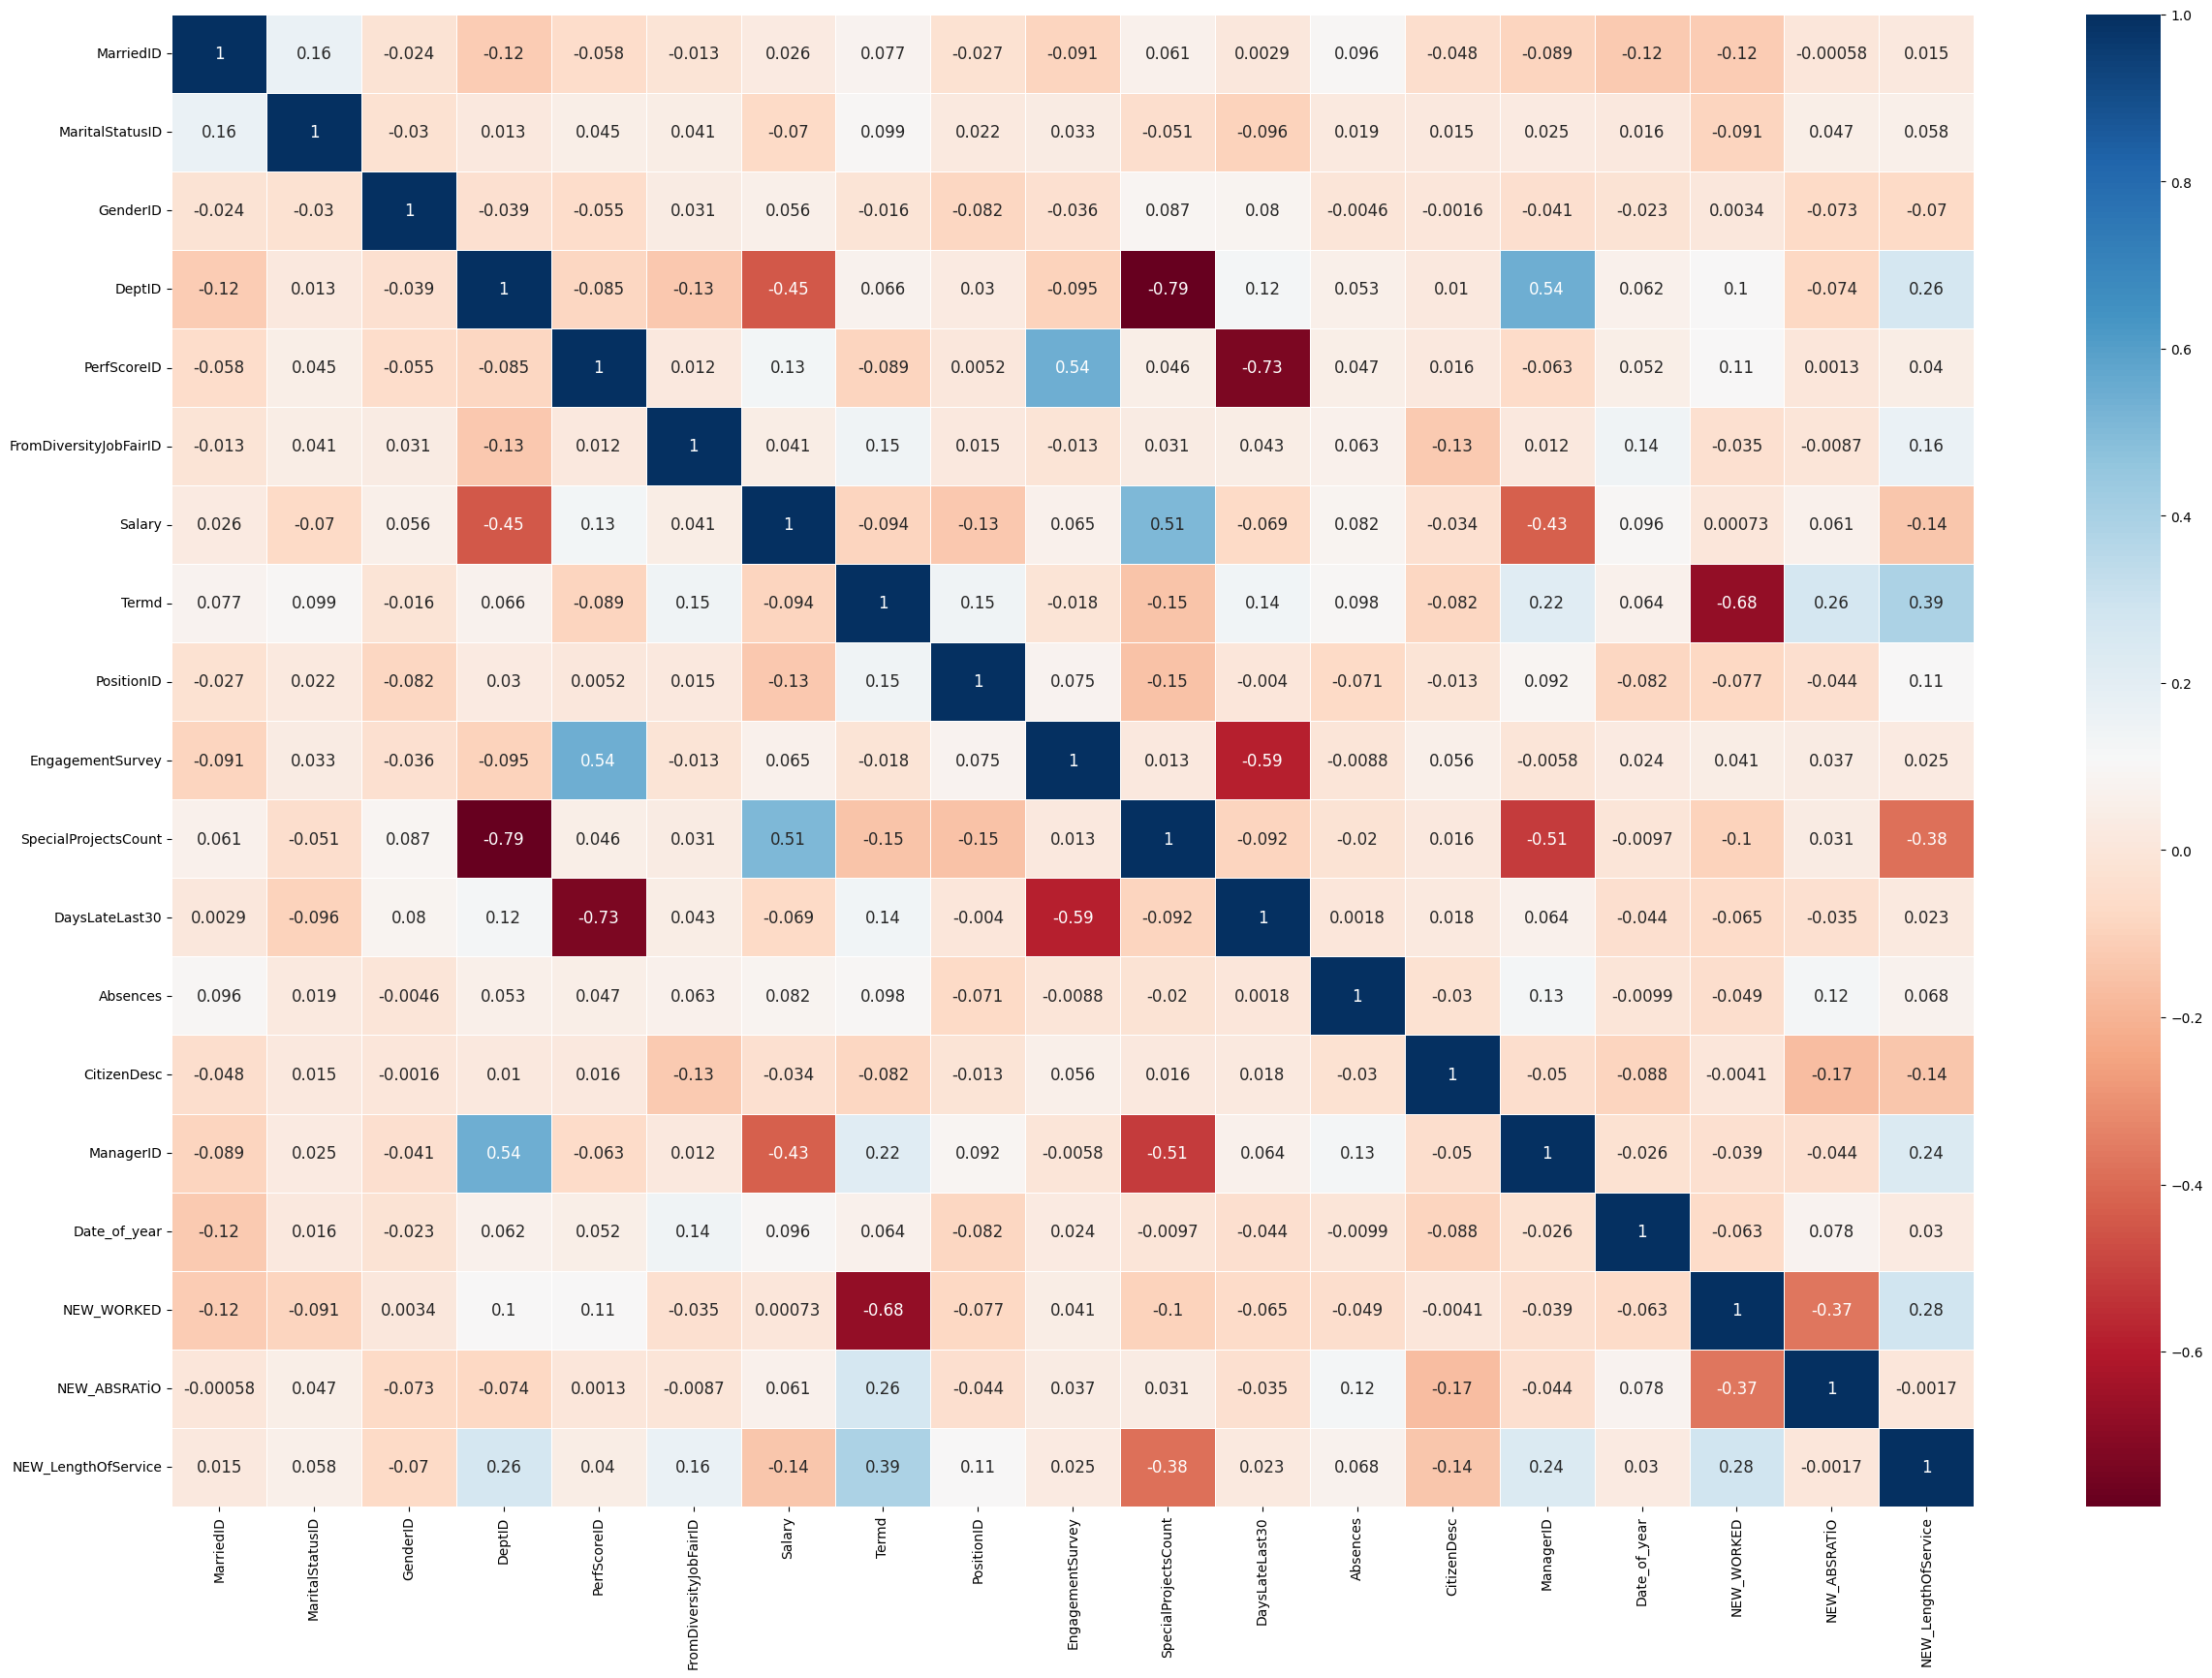

In [ ]:
#korelasyon matrisi oluştur, sayısal değişkenlerin ilişkisini ısı haritası ile gösterir
import matplotlib.pyplot as plt
import seaborn as sns

def correlation_matrix(df,columns):
    fig = plt.gcf()
    fig.set_size_inches(30,20)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[columns].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)


columns=df.columns
correlation_matrix(df,columns)

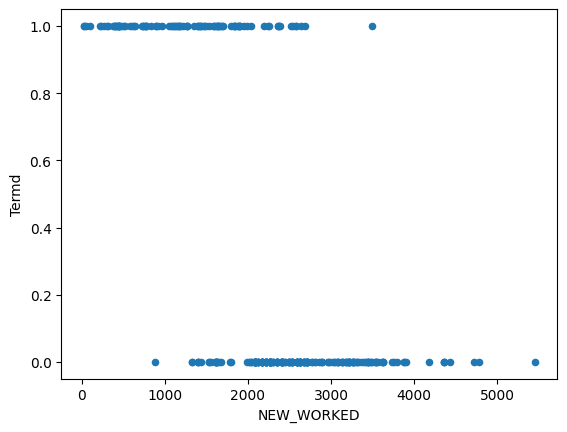

In [ ]:
import matplotlib.pyplot as plt
df.plot.scatter("NEW_WORKED","Termd")
plt.show()

In [ ]:
#değişken türlerinin ayrıştırılması
#kategorik değişkenleri, sayısal değişkenleri ve kategorik gibi gözüken kardinal değişkenleri
#(cat_th --> kategorik değişkenler içinde sayısal gibi gözüken ama şu kadar sayıdan az sınıfı olan değişkenler(yani hem normal,hem sinsi kategorik değişkenler var))
#kategorik gibi gözüken ama kardinal olan yani 40 tane sınıfı olup bir ayırt edicilik taşımayan değişkenler (car_th)
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category","object","bool"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes not in ["category","object","bool"]] #numeric ama categoric
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category","object"]] #kategorik olup eşsiz sınıf sayısı 20 den fazla olanlar
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car] #kategorik değişkenlerin hepsi
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes not in ["category","object","bool"]]
    num_cols = [col for col in num_cols if col not in cat_cols] #sayısal değişkenlerin hepsi
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols),cat_cols}")
    print(f"num_cols: {len(num_cols),num_cols}")
    print(f"cat_but_car: {len(cat_but_car),cat_but_car}")
    print(f"num_but_cat: {len(num_but_cat),num_but_cat}")

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=10, car_th=20)

Observations: 311
Variables: 31
cat_cols: (18, ['Sex', 'HispanicLatino', 'RaceDesc', 'RecruitmentSource', 'EmpSatisfaction', 'NEW_ENGAGEMENT', 'NEW_Salary', 'NEW_LATE_ARRIVALS', 'MarriedID', 'MaritalStatusID', 'GenderID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Termd', 'SpecialProjectsCount', 'DaysLateLast30', 'CitizenDesc'])
num_cols: (12, ['Salary', 'PositionID', 'DOB', 'DateofHire', 'EngagementSurvey', 'LastPerformanceReview_Date', 'Absences', 'ManagerID', 'Date_of_year', 'NEW_WORKED', 'NEW_ABSRATİO', 'NEW_LengthOfService'])
cat_but_car: (1, ['State'])
num_but_cat: (10, ['MarriedID', 'MaritalStatusID', 'GenderID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Termd', 'SpecialProjectsCount', 'DaysLateLast30', 'CitizenDesc'])


In [ ]:
#cat_but_car dan State değişkenini çıkarmak için:
cat_but_car=[col for col in cat_but_car if col not in ["Position","State"]]

#cat_cols a ekliyoruz
cat_cols.append("State")

#num_cols tan çıkarıp , cat_cols a ekliyoruz PositionID,ManagerID
num_cols=[col for col in num_cols if col not in ["PositionID","ManagerID"]]
cat_cols.append("PositionID")
cat_cols.append("ManagerID")

print(cat_but_car)
print(cat_cols)
print(num_cols)

[]
['Sex', 'HispanicLatino', 'RaceDesc', 'RecruitmentSource', 'EmpSatisfaction', 'NEW_ENGAGEMENT', 'NEW_Salary', 'NEW_LATE_ARRIVALS', 'MarriedID', 'MaritalStatusID', 'GenderID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Termd', 'SpecialProjectsCount', 'DaysLateLast30', 'CitizenDesc', 'State', 'PositionID', 'ManagerID']
['Salary', 'DOB', 'DateofHire', 'EngagementSurvey', 'LastPerformanceReview_Date', 'Absences', 'Date_of_year', 'NEW_WORKED', 'NEW_ABSRATİO', 'NEW_LengthOfService']


In [ ]:
#bağımlı bir değişkeni sayısal değişken ile özetlemek için (bağımlı değişkene(target) göre group by alıyoruz, sayısal değişkenin ortalamasını alıyoruz)
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

target_summary_with_num(df,"Termd","Salary")

          Salary
Termd           
0     70694.0338
1     65690.0769




In [ ]:
#bağımlı bir değişkeni kategorik değişken ile özetlemek için (kategorik değişkene göre group by alıyoruz, bağımlı değişkenin(target) ortalamasını alıyoruz)
def target_summary_with_cat(dataframe, target,categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

target_summary_with_cat(df,"Termd","PositionID")

            TARGET_MEAN
PositionID             
1                0.0000
2                0.6667
3                0.1481
4                0.0000
5                0.0000
6                0.0000
7                0.0000
8                0.6000
9                0.2500
10               0.0000
11               0.0000
12               0.0000
13               0.2500
14               0.0000
15               0.2000
16               0.0000
17               0.0000
18               0.3846
19               0.3796
20               0.4561
21               0.3333
22               0.0000
23               0.5000
24               0.3333
25               0.0000
26               0.0000
27               0.5000
28               0.0000
29               1.0000
30               1.0000




count      311.0000
mean     69020.6849
std      25156.6369
min      45046.0000
5%       46999.5000
10%      50178.0000
20%      53189.0000
30%      57748.0000
40%      60340.0000
50%      62810.0000
60%      64724.0000
70%      68678.0000
80%      75188.0000
90%      95660.0000
95%     108106.5000
99%     177250.0000
max     250000.0000
Name: Salary, dtype: float64


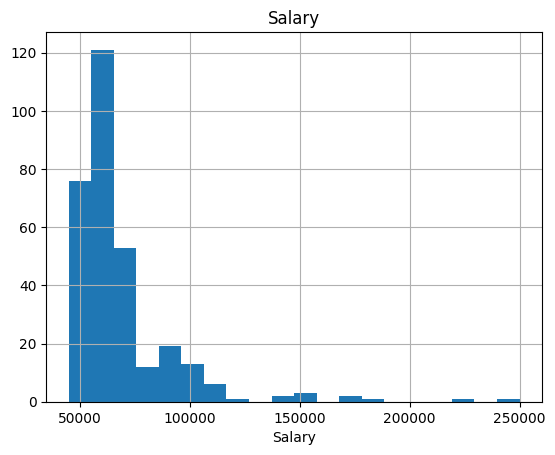

<ipython-input-35-8360de25af49>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


count                     311
unique                    307
top       2065-09-09 00:00:00
freq                        2
first     1973-01-12 00:00:00
last      2072-11-21 00:00:00
Name: DOB, dtype: object


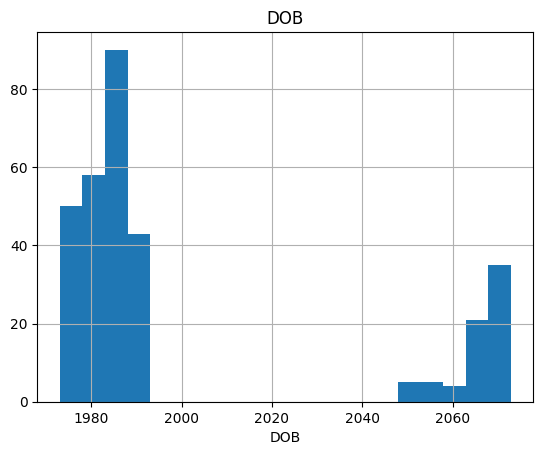

<ipython-input-35-8360de25af49>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


count                     311
unique                    101
top       2011-01-10 00:00:00
freq                       14
first     2006-01-09 00:00:00
last      2018-07-09 00:00:00
Name: DateofHire, dtype: object


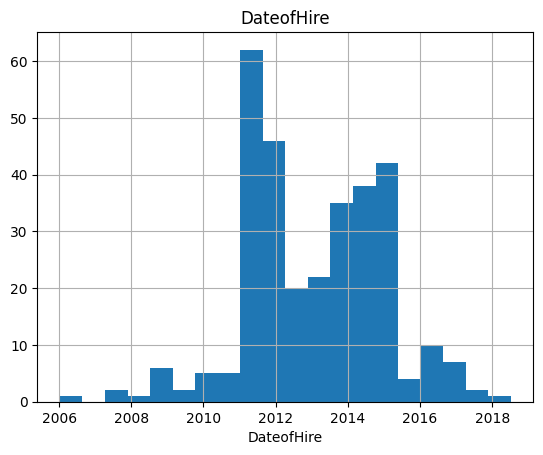

count   311.0000
mean      4.1100
std       0.7899
min       1.1200
5%        2.4000
10%       3.0400
20%       3.5000
30%       3.8800
40%       4.1000
50%       4.2800
60%       4.4600
70%       4.6000
80%       4.8300
90%       5.0000
95%       5.0000
99%       5.0000
max       5.0000
Name: EngagementSurvey, dtype: float64


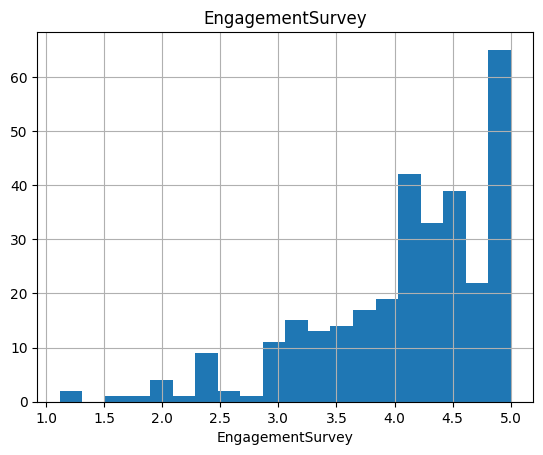

<ipython-input-35-8360de25af49>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


count                     311
unique                    137
top       2019-01-14 00:00:00
freq                       18
first     2010-07-14 00:00:00
last      2019-02-28 00:00:00
Name: LastPerformanceReview_Date, dtype: object


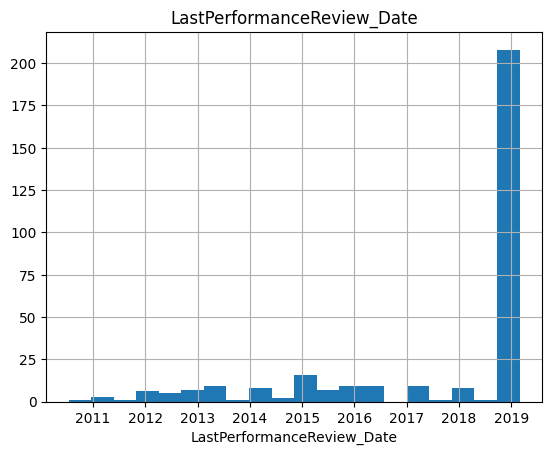

count   311.0000
mean     10.2379
std       5.8526
min       1.0000
5%        2.0000
10%       2.0000
20%       4.0000
30%       6.0000
40%       8.0000
50%      10.0000
60%      13.0000
70%      15.0000
80%      16.0000
90%      18.0000
95%      19.0000
99%      20.0000
max      20.0000
Name: Absences, dtype: float64


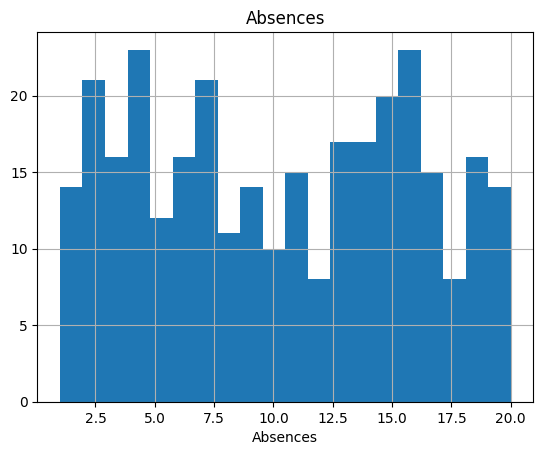

count    311.0000
mean    2001.0997
std       35.0921
min     1973.0000
5%      1974.0000
10%     1976.0000
20%     1979.0000
30%     1981.0000
40%     1983.0000
50%     1985.0000
60%     1987.0000
70%     1989.0000
80%     2054.0000
90%     2068.0000
95%     2070.0000
99%     2072.0000
max     2072.0000
Name: Date_of_year, dtype: float64


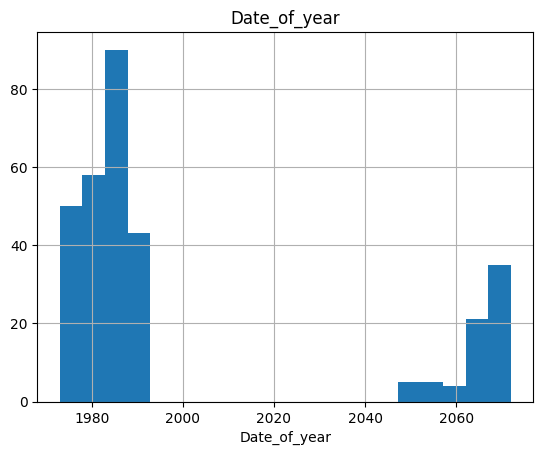

count    311.0000
mean    2196.0611
std      977.0152
min       26.0000
5%       435.5000
10%      765.0000
20%     1400.0000
30%     1675.0000
40%     2083.0000
50%     2265.0000
60%     2412.0000
70%     2629.0000
80%     3042.0000
90%     3420.0000
95%     3623.0000
99%     4421.0000
max     5450.0000
Name: NEW_WORKED, dtype: float64


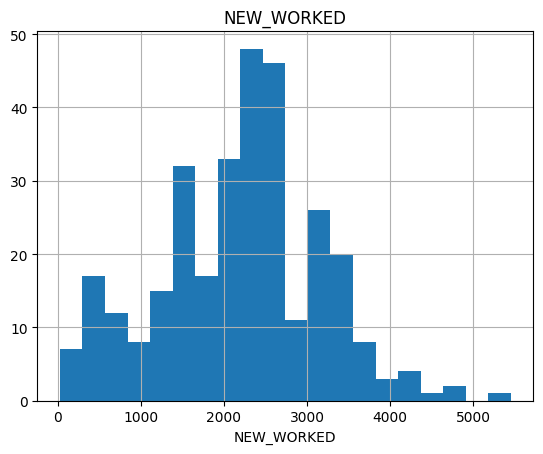

count   311.0000
mean      0.9828
std       3.1600
min       0.0258
5%        0.0660
10%       0.0975
20%       0.1873
30%       0.2755
40%       0.3682
50%       0.4574
60%       0.5472
70%       0.7059
80%       0.9121
90%       1.5306
95%       2.5633
99%       6.7009
max      38.4615
Name: NEW_ABSRATİO, dtype: float64


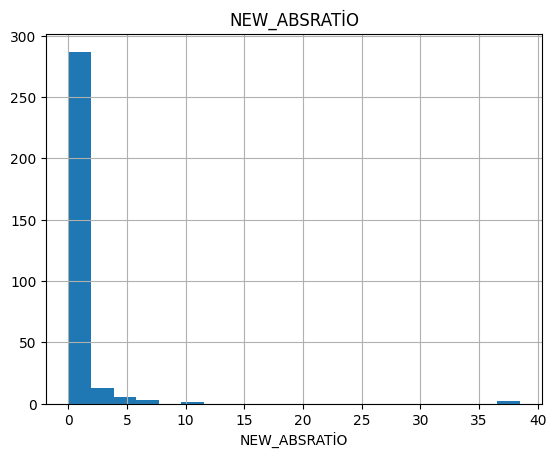

count   311.0000
mean      6.3119
std       1.9566
min       1.0000
5%        3.0000
10%       4.0000
20%       5.0000
30%       5.0000
40%       6.0000
50%       6.0000
60%       7.0000
70%       8.0000
80%       8.0000
90%       8.0000
95%       9.0000
99%      11.0000
max      13.0000
Name: NEW_LengthOfService, dtype: float64


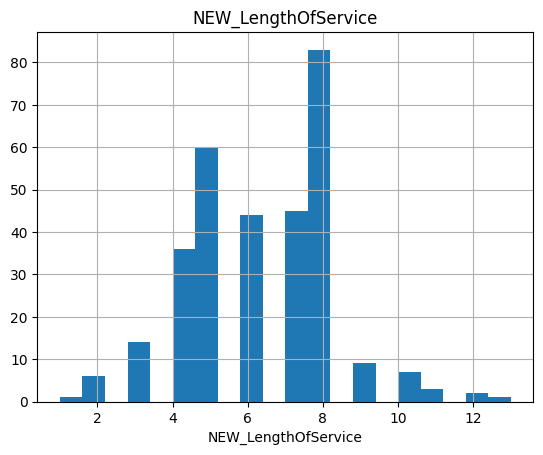

          Salary
Termd           
0     70694.0338
1     65690.0769


                                DOB
Termd                              
0     2000-01-11 20:31:18.260869504
1     2004-10-01 03:41:32.307692288


                         DateofHire
Termd                              
0     2013-08-25 17:51:18.260869632
1     2011-12-28 07:36:55.384615424


       EngagementSurvey
Termd                  
0                4.1198
1                4.0905


         LastPerformanceReview_Date
Termd                              
0     2019-01-29 16:20:52.173913088
1     2014-12-09 03:55:23.076923136


       Absences
Termd          
0        9.8309
1       11.0481


       Date_of_year
Termd              
0         1999.5217
1         2004.2404


       NEW_WORKED
Termd            
0       2664.2560
1       1264.1731


       NEW_ABSRATİO
Termd              
0            0.3938
1            2.1551


       NEW_LengthOfService
Termd                     
0                   5.7681
1        

In [ ]:
#sayısal değişkenlerin incelenmesi
df[num_cols].describe().T

#sayısal değişkenlerin grafiğini oluşturmak için:
for col in num_cols:
    num_summary(df,col,plot=True)

#target ile sayısal değişkenlerin incelenmesi
for col in num_cols:
    target_summary_with_num(df,"Termd",col)

#target ile kategorik değişkenlerin incelenmesi
target_summary_with_cat(df,"Termd","PositionID")

###################### PreProcess işlemleri #######################

In [ ]:
#alt ve üst eşik değerlerini hesaplar sütunların (boxplot, iqr yöntemiyle yapar,3.çeyrekten iqr kadar yukarı çıkılır, 1.çeyrekten iqr kadar aşağı inilir)
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

outlier_thresholds(df,"Salary")

(-44661.0, 199767.0)

In [ ]:
#aykırı değer var mı,yok mu ona bakar (outlier thresholds fonksiyonundan sonra direk kullanabiliriz. "replace_with_thresholds" bu fonksiyonu atlarız)
def check_outlier(dataframe, col_name, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

check_outlier(df,"Salary")

for col in num_cols:
    print(col,check_outlier(df,col))

Salary True
DOB False
DateofHire False
EngagementSurvey False
LastPerformanceReview_Date False
Absences False
Date_of_year False
NEW_WORKED False
NEW_ABSRATİO True
NEW_LengthOfService False


<ipython-input-45-0c0dbf423e17>:4: FutureWarning: The default value of bool_only in DataFrame.any is deprecated. In a future version, it will default to False. In addition, specifying 'bool_only=None' is deprecated. Select only valid columns or specify the value of bool_only to silence this warning.
<ipython-input-45-0c0dbf423e17>:4: FutureWarning: The default value of bool_only in DataFrame.any is deprecated. In a future version, it will default to False. In addition, specifying 'bool_only=None' is deprecated. Select only valid columns or specify the value of bool_only to silence this warning.
<ipython-input-45-0c0dbf423e17>:4: FutureWarning: The default value of bool_only in DataFrame.any is deprecated. In a future version, it will default to False. In addition, specifying 'bool_only=None' is deprecated. Select only valid columns or specify the value of bool_only to silence this warning.
<ipython-input-45-0c0dbf423e17>:4: FutureWarning: The default value of bool_only in DataFrame.any

In [ ]:
#aykırı değerleri görmek için
#aykırı değer sayısı 10 dan büyükse head leri getirsin eğer küçükse hepsini göstersin aykırı değerlerin
def grab_outliers(dataframe, col_name, index=False):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))].head())
    else:
        print(dataframe[((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))])
    if index:
        outlier_index = dataframe[((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))].index
        return outlier_index

grab_outliers(df,"Salary")
#indexleri de gösterir
outliers_index=grab_outliers(df,"Salary",True)
print(outliers_index)

     MarriedID  MaritalStatusID  GenderID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  Termd  PositionID State        DOB Sex HispanicLatino RaceDesc DateofHire  RecruitmentSource  EngagementSurvey EmpSatisfaction  SpecialProjectsCount LastPerformanceReview_Date  DaysLateLast30  Absences  CitizenDesc  ManagerID  Date_of_year  NEW_WORKED  NEW_ABSRATİO NEW_ENGAGEMENT NEW_Salary NEW_LATE_ARRIVALS  NEW_LengthOfService
150          1                1         0       2            3                       0  250000      0          16    MA 2054-09-21   F              1    White 2012-07-02             Indeed            4.8300        Kararsız                     0                 2019-01-17               0        10       1.0000     9.0000          2054        3084        0.3243         Yüksek     Yüksek                Az                    7
308          0                0         0       3            4                       0  220450      0           6    MA 1979-08-30   F            

In [ ]:
#aykırı değer olan değişkenin yerine bu eşik değeri koy fonksiyonu(aykırı değer yerine)
#aykırı değer baskılama yöntemi eşik değerlerin üzerinde kalan değerler eşik değerler ile değiştirilir
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

#outlier var mı yok mu baktık
for col in num_cols:
    print(col,check_outlier(df,col))

#outlier ı baskıladık
for col in num_cols:
    replace_with_thresholds(df,col)

# tekrar outlier var mı yok mu baktık
for col in num_cols:
    print("sonuç:",col,check_outlier(df,col))

Salary True
DOB False
DateofHire False
EngagementSurvey False
LastPerformanceReview_Date False
Absences False
Date_of_year False
NEW_WORKED False
NEW_ABSRATİO True
NEW_LengthOfService False
sonuç: Salary False
sonuç: DOB False
sonuç: DateofHire False
sonuç: EngagementSurvey False
sonuç: LastPerformanceReview_Date False
sonuç: Absences False
sonuç: Date_of_year False
sonuç: NEW_WORKED False
sonuç: NEW_ABSRATİO False
sonuç: NEW_LengthOfService False


<ipython-input-45-0c0dbf423e17>:4: FutureWarning: The default value of bool_only in DataFrame.any is deprecated. In a future version, it will default to False. In addition, specifying 'bool_only=None' is deprecated. Select only valid columns or specify the value of bool_only to silence this warning.
<ipython-input-45-0c0dbf423e17>:4: FutureWarning: The default value of bool_only in DataFrame.any is deprecated. In a future version, it will default to False. In addition, specifying 'bool_only=None' is deprecated. Select only valid columns or specify the value of bool_only to silence this warning.
<ipython-input-45-0c0dbf423e17>:4: FutureWarning: The default value of bool_only in DataFrame.any is deprecated. In a future version, it will default to False. In addition, specifying 'bool_only=None' is deprecated. Select only valid columns or specify the value of bool_only to silence this warning.
<ipython-input-45-0c0dbf423e17>:4: FutureWarning: The default value of bool_only in DataFrame.any

In [ ]:
#kategorik değişkenlerde kullanılır. one hot encoder ı aynı zamanda label encoder olarak da kullanabilmek için drop_first ü True yapabiliriz (yani ilk sınıfı drop ettiğinde dummy değişkenden kurtulacak)
#2 sınıf ya da daha fazla sınıfa sahip olan değişkenleri sadece one hot encoder ile biçimlendirebiliyor olacağız

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

#one_hot_encoder(df,["DeptID"])

In [ ]:
#Preprocess Fonksiyonları
from sklearn.preprocessing import StandardScaler

def data_prep(dataframe,num_cols):
    dataframe = one_hot_encoder(dataframe, cat_cols, drop_first=True)
    num_cols=[col for col in num_cols if col not in ["DOB","DateofHire","LastPerformanceReview_Date"]]
    for col in num_cols:
        replace_with_thresholds(dataframe,col)
    X_scaled = StandardScaler().fit_transform(dataframe[num_cols])
    dataframe[num_cols] = pd.DataFrame(X_scaled, columns=dataframe[num_cols].columns)
    y=dataframe["Termd_1"]
    X=dataframe.drop(["Termd_1","DOB","DateofHire","LastPerformanceReview_Date"],axis=1)
    return X,y

X,y = data_prep(df,num_cols)
print(X)
print(y)

     Salary  EngagementSurvey  Absences  Date_of_year  NEW_WORKED  NEW_ABSRATİO  NEW_LengthOfService  Sex_M   HispanicLatino_1  RaceDesc_Asian  RaceDesc_Black or African American  RaceDesc_Hispanic  RaceDesc_Two or more races  RaceDesc_White  RecruitmentSource_Diversity Job Fair  RecruitmentSource_Employee Referral  RecruitmentSource_Google Search  RecruitmentSource_Indeed  RecruitmentSource_LinkedIn  RecruitmentSource_On-line Web application  RecruitmentSource_Other  RecruitmentSource_Website  EmpSatisfaction_Kararsız  EmpSatisfaction_Memnun  NEW_ENGAGEMENT_Orta  NEW_ENGAGEMENT_Yüksek  NEW_Salary_Orta  NEW_Salary_Yüksek  NEW_LATE_ARRIVALS_Orta  NEW_LATE_ARRIVALS_Çok  MarriedID_1  MaritalStatusID_1  MaritalStatusID_2  MaritalStatusID_3  MaritalStatusID_4  GenderID_1  DeptID_2  DeptID_3  DeptID_4  DeptID_5  DeptID_6  PerfScoreID_2  PerfScoreID_3  PerfScoreID_4  FromDiversityJobFairID_1  SpecialProjectsCount_1  SpecialProjectsCount_2  SpecialProjectsCount_3  SpecialProjectsCount_4  Speci

<ipython-input-48-ceb4a9ec4a6d>:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)


###################### ML işlemleri #######################

In [ ]:
import joblib
import seaborn as sns
from matplotlib import pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from time import time

In [ ]:
from time import time
#base models

t0=time()
def base_models(X,y,scoring="roc_auc"):
    print("Base Models...")
    classifiers = [('KNN',KNeighborsClassifier()),
                   ('CART',DecisionTreeClassifier()),
                   ('RF',RandomForestClassifier()),
                   ('Adaboost',AdaBoostClassifier()),
                   ('GBM',GradientBoostingClassifier()),
                   ('LightGBM',LGBMClassifier()),# daha performanslı
                  ]
    for name, classifier in classifiers:
        global t0
        cv_results = cross_validate(classifier, X, y, cv=10, scoring=scoring)
        temp2 = time()
        temp = temp2 - t0
        print(f"{scoring} : {round(cv_results['test_score'].mean(),4)} ({name})")
        print(f"Time: {round(temp,4)} ")
        t0=temp2

base_models(X,y)
#base_models(X,y,scoring="f1") --f1 score una göre sıralar
#base_models(X,y,scoring="accuracy") #accuracy score una göre sıralar

#LightGBM i seçtik

Base Models...
roc_auc : 0.9725 (KNN)
Time: 0.3112 
roc_auc : 0.9686 (CART)
Time: 0.1043 
roc_auc : 0.9907 (RF)
Time: 2.205 
roc_auc : 0.9923 (Adaboost)
Time: 1.9677 
roc_auc : 0.9967 (GBM)
Time: 2.4222 
roc_auc : 0.9973 (LightGBM)
Time: 0.9976 


Accuracy: 0.9904
Precision: 0.9903
Recall: 0.9808
Roc_Auc: 0.9961
F1: 0.9855


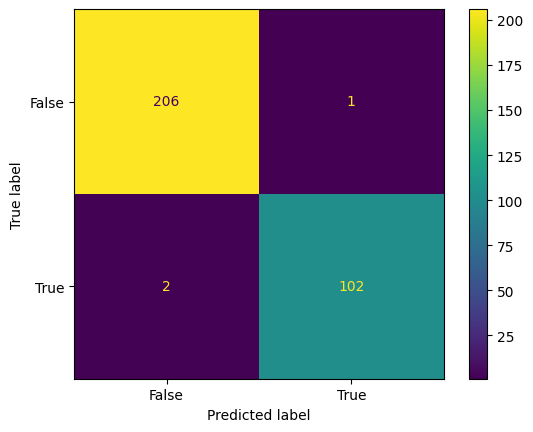

In [ ]:
#confusion matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy

parameters = {'learning_rate': [0.01,0.1], 'n_estimators': [300,500]}
def confusion_matrix(y):
    search = GridSearchCV(estimator=LGBMClassifier(),param_grid=parameters)
    y_pred = cross_val_predict(search, X, y, cv=10)
    y_pred_prob = cross_val_predict(search, X, y, cv=10,method='predict_proba')
    y_pred_prob = y_pred_prob[:,1]
    conf_mat = metrics.confusion_matrix(y, y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = [False, True])
    dogruluk = metrics.accuracy_score(y, y_pred)
    precision= metrics.precision_score(y, y_pred)
    recall = metrics.recall_score(y, y_pred)
    roc_auc = metrics.roc_auc_score(y, y_pred_prob)
    #fpr,tpr,th = metrics.roc_curve(y, y_pred)
    #roc_auc = metrics.auc(fpr,tpr)
    f1 = metrics.f1_score(y, y_pred)
    print(f"Accuracy: {round(dogruluk.mean(), 4)}")
    print(f"Precision: {round(precision.mean(), 4)}")
    print(f"Recall: {round(recall.mean(), 4)}")
    print(f"Roc_Auc: {round(roc_auc.mean(), 4)}")
    print(f"F1: {round(f1.mean(), 4)}")
    #confusion matrix
    cm_display.plot()
    plt.show()


confusion_matrix(y)

roc curve çizelim,sql e yazdırsın sonuçları sql den select atsın,plot importance

In [ ]:
def plot_importance(model, features, num=len(X), save=False):
  """
model = Kullandığımız model Decision Trees, Random Forests, Gradient Boosting Machines (GBM), XGBoost, Light GBM gibi modeller olabilir.
features = Değişkenler
num = Kaç değişken göstermek istiyoruz









  """
  feature_imp = pd.DataFrame({"Value" : model.feature_importances_, "Feature" : features.columns })
  plt.figure(figsize= (10,10))
  sns.set(font_scale=1)
  sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])

  plt.title("Features")
  plt.tight_layout()
  plt.show()
  if save:
    plt.savefig("importances.png")


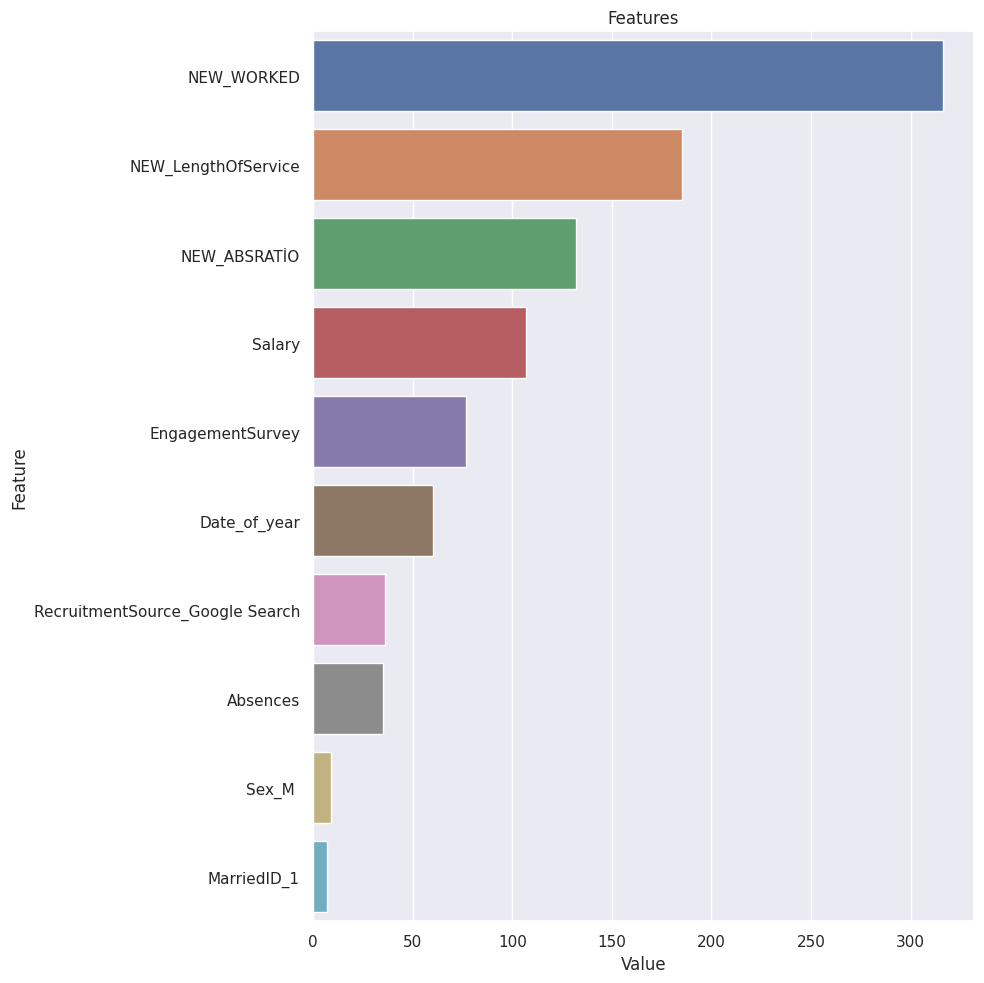

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        63
           1       1.00      0.97      0.98        31

    accuracy                           0.99        94
   macro avg       0.99      0.98      0.99        94
weighted avg       0.99      0.99      0.99        94

fit_time 0.03737449645996094
score_time 0.010244655609130859
test_accuracy 0.993599590373784
test_f1 0.9902439024390244
test_roc_auc 0.9983739837398374


In [ ]:
# Plot İmportance Enes

from sklearn.metrics import classification_report, roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=45)
model = LGBMClassifier(random_state=17).fit(X_train,y_train)
plot_importance(model, X, 10)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_prob)

model = LGBMClassifier(random_state=17).fit(X,y)

cv_results = cross_validate(model, X, y, cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

for i in cv_results:
  print(i, cv_results[i].mean())




In [ ]:
# Parametre Optimizasyonu Enes

lightgbm_params = {"learning_rate" : [0.01, 0.1],
                   "n_estimators" : [300, 500],
                  "colsample_bytree" : [0.7, 1] }

classifiers = [("LightGBM", LGBMClassifier(),lightgbm_params)]

def hyperparameter_optimization(X, y, cv=5, scoring="roc_auc"):
  print(" Hyper Parameters Optimization")
  best_models = {}

  for name, classifier, params in classifiers:
    print(f"################ {name} #####################")
    cv_results = cross_validate(classifier, X, y, cv=3, scoring=scoring)
    #print("###### BEFORE ######")
    print(f"{scoring} ( BEFORE ) {round(cv_results['test_score'].mean(),4)}, ({name})")

    gs = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X,y)
    final_model = classifier.set_params(**gs.best_params_)

    cv_results = cross_validate(final_model, X, y, cv=3, scoring=scoring)
    #print("###### AFTER ######")
    print(f"{scoring} ( AFTER ) {round(cv_results['test_score'].mean(),4)}, ({name})")
    print(f"{name} best params :   {gs.best_params_} ", end="\n\n")
    best_models[name] = final_model


  return best_models

best_models = hyperparameter_optimization(X,y)



 Hyper Parameters Optimization
################ LightGBM #####################
roc_auc ( BEFORE ) 0.9968, (LightGBM)
roc_auc ( AFTER ) 0.9989, (LightGBM)
LightGBM best params :   {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'n_estimators': 300} 



Hyper Parameters Optimization
################ LightGBM #####################
* roc_auc ( BEFORE ) 0.9968, (LightGBM)
* roc_auc ( AFTER ) 0.9989, (LightGBM)
* LightGBM best params :   {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'n_estimators': 300}

In [ ]:
#Classifier Seçimi için olabilir Enes

from sklearn.ensemble import  VotingClassifier
def voting_classifier(best_models, X, y):
  print("Voting Classifier...", end="\n")

  voting_clf = VotingClassifier(estimators=[("LightGBM", best_models["LightGBM"])],  # Boasting
                                voting="soft").fit(X,y)




  cv_results = cross_validate(voting_clf, X, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])
  print(f"Accuracy :    {cv_results['test_accuracy'].mean()}")
  print(f"F1 :    {cv_results['test_f1'].mean()}")
  print(f"roc_auc :    {cv_results['test_roc_auc'].mean()}")

  return voting_clf

voting_clf = voting_classifier(best_models, X, y)

Voting Classifier...
Accuracy :    0.9967637540453075
F1 :    0.9950248756218905
roc_auc :    0.9988633134413186


In [ ]:
random_user = X.sample(1)
voting_clf.predict(random_user)

array([1], dtype=uint8)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


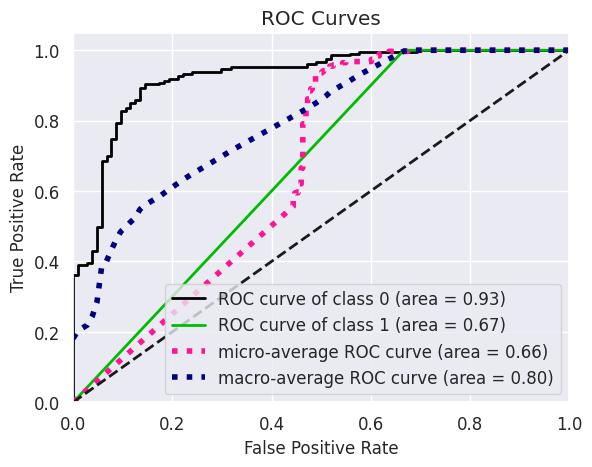

In [ ]:
#roc curve cansu
!pip install scikit-plot

import scikitplot as skplt
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb = nb.fit(X, y)
y_probas = nb.predict_proba(X)
skplt.metrics.plot_roc(y, y_probas)
plt.show()